## Importing libraries

In [12]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy import misc
import imageio

## Function for Loading image

In [13]:
def load_image():
    image_input = imageio.imread('/content/drive/MyDrive/input.png') 
    image = image_input / 255 
    return image

## Function to initialize means

#### reshaping, num_clusters = no. of clusters, means = centroids

In [21]:
def init_means(image,num_clusters):
    datapoints = np.reshape(image, (image.shape[0] * image.shape[1],
                                             image.shape[2])) 
    m, n = datapoints.shape 
    means = np.zeros((num_clusters, n)) 
    for i in range(num_clusters):
        rand_1 = int(np.random.random(1)*10)
        rand_2 = int(np.random.random(1)*8)
        means[i, 0] = datapoints[rand_1, 0]
        means[i, 1] = datapoints[rand_2, 1]
    return datapoints, means

## Function for euclidean distance

In [22]:
def euclidean_dist(x1, y1, x2, y2):   
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)
    return dist

## Function for k means

In [33]:
def kmeans(datapoints, means, num_clusters):
    n_iterations = 10
    m, n = datapoints.shape
    index = np.zeros(m) 
    #k-means
    while(n_iterations > 0):
        for j in range(len(datapoints)):  
            # initialize mini value to 1000
            minv = 1000
            temp = None              
            for k in range(num_clusters):                  
                x1 = datapoints[j, 0]
                y1 = datapoints[j, 1]
                x2 = means[k, 0]
                y2 = means[k, 1]                  
                if(euclidean_dist(x1, y1, x2, y2) < minv):         
                    minv = euclidean_dist(x1, y1, x2, y2)
                    temp = k
                    index[j] = k          
        for k in range(num_clusters):             
            sum_x = 0
            sum_y = 0
            count = 0              
            for j in range(len(datapoints)):                 
                if(index[j] == k):
                    sum_x += datapoints[j, 0]
                    sum_y += datapoints[j, 1] 
                    count += 1              
            if(count == 0):
                count = 1                  
            means[k, 0] = float(sum_x / count)
            means[k, 1] = float(sum_y / count)                   
        n_iterations -= 1  
    return means, index

## Function for Image compression

In [38]:
def compressed_image(means, index, image):  
    centroid = np.array(means)
    recover_image = centroid[index.astype(int), :]      
    # 3d matrix
    recover_image = np.reshape(recover_image, (img.shape[0], img.shape[1],
                                                     img.shape[2]))
    # plot
    plt.imshow(recover_image)
    plt.show() 
    # save image.
    imageio.imwrite('output_' + str(clusters) +
                        'colors.png', recover_image)

Enter the number of colors in the compressed image. default = 12
5


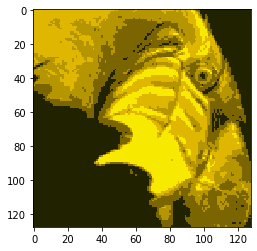

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [39]:
image = load_image()

clusters = 12
clusters = int(input('Enter the number of colors in the compressed image. default = 12\n'))

datapoints, means = init_means(image, clusters)
means, index = kmeans(datapoints, means, clusters)
compressed_image(means, index, image)